# Task 2.4 - Optimizing Hyperparameters - Random Forest 2010s

## Table of Contents

#### 1. Importing Libraries and Data
- Cleaned weather observations from 2.2, pleasant weather (predictions)
#### 2. Data Wrangling
-  For this script: reduce data to the 2010s only
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Hyperparameter Optimization
- Grid Search
- Random Search
#### 6. Running Random Forest with Optimized Search Parameters
#### 7.  Uncovering Feature Importances

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

2024-09-13 10:24:47.042797: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set a path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins'

In [3]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [4]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [6]:
X.shape

(22950, 137)

In [7]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
answers.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to the 2010s (2010-2019).

In [9]:
# Reduce observations dataset to 2010's

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.9965,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,7,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0193,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [10]:
# Reduce answers dataset to 2010's

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [12]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [13]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [14]:
answers_decade.shape # predictions dataset has the correct shape

(3652, 15)

## 3. Reshaping for Modeling
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [15]:
X = dfdecade

In [16]:
y = answers_decade

In [17]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [18]:
X.shape

(3652, 135)

In [19]:
y.shape

(3652, 15)

## 4. Data Split 

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Hyperparameter Optimization

### Grid Search

In [22]:
# Create a RF classifier

clf = RandomForestClassifier()

In [23]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [24]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.447 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.423 total time=   3.5s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.419 total time=   2.2s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.447 total time=   3.8s
[CV 2/

[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.405 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.447 total time=   1.5s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.448 total time=   3.9s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.426 total time=   3.9s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.449 total time=   1.7s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_s

[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.437 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.434 total time=   1.6s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.412 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.422 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samp

[CV 1/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.487 total time=   2.6s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.495 total time=   2.1s
[CV 1/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.480 total time=   0.2s
[CV 2/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.486 total time=   0.2s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.482 total time=   0.2s
[CV 1/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.483 total time=   2.1s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.499 total time=   2.7s
[CV 1/3] END max_depth=5, max_features=50, min_samples_leaf=1, mi

[CV 2/3] END max_depth=5, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.475 total time=   2.3s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.493 total time=   2.4s
[CV 1/3] END max_depth=5, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.479 total time=   4.7s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.498 total time=   4.4s
[CV 2/3] END max_depth=5, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.472 total time=   4.4s
[CV 1/3] END max_depth=5, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.486 total time=   4.4s
[CV 2/3] END max_depth=5, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.479 total time=   2.1s
[CV 3/3] END max_depth=5, max_features=15, min_samples_leaf=2,

[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.417 total time=   1.5s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.435 total time=   4.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.416 total time=   4.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.419 total time=   3.4s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.429 total time=   1.6s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.450 total time=   3.4s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=3, mi

[CV 3/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.514 total time=   1.8s
[CV 2/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.521 total time=   1.4s
[CV 3/3] END max_depth=5, max_features=135, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.528 total time=   1.5s
[CV 1/3] END max_depth=5, max_features=135, min_samples_leaf=1, mi

Search took 45.59411429961522 minutes


In [25]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6436655713764147


### Random Search

In [27]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [28]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [29]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 8.768098998069764 minutes


In [30]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 71, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 410}
Best RANDOM search score is: 0.6385542168674698


In [33]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6436655713764147
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 71, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 410}
Best RANDOM search score is: 0.6385542168674698


#### The GRID Search gave a better accuracy score, so let's use those hyperparameters to optimize the random forest.

## 6. Running Random Forest with Optimized Search Parameters

In [34]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [35]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6626506024096386


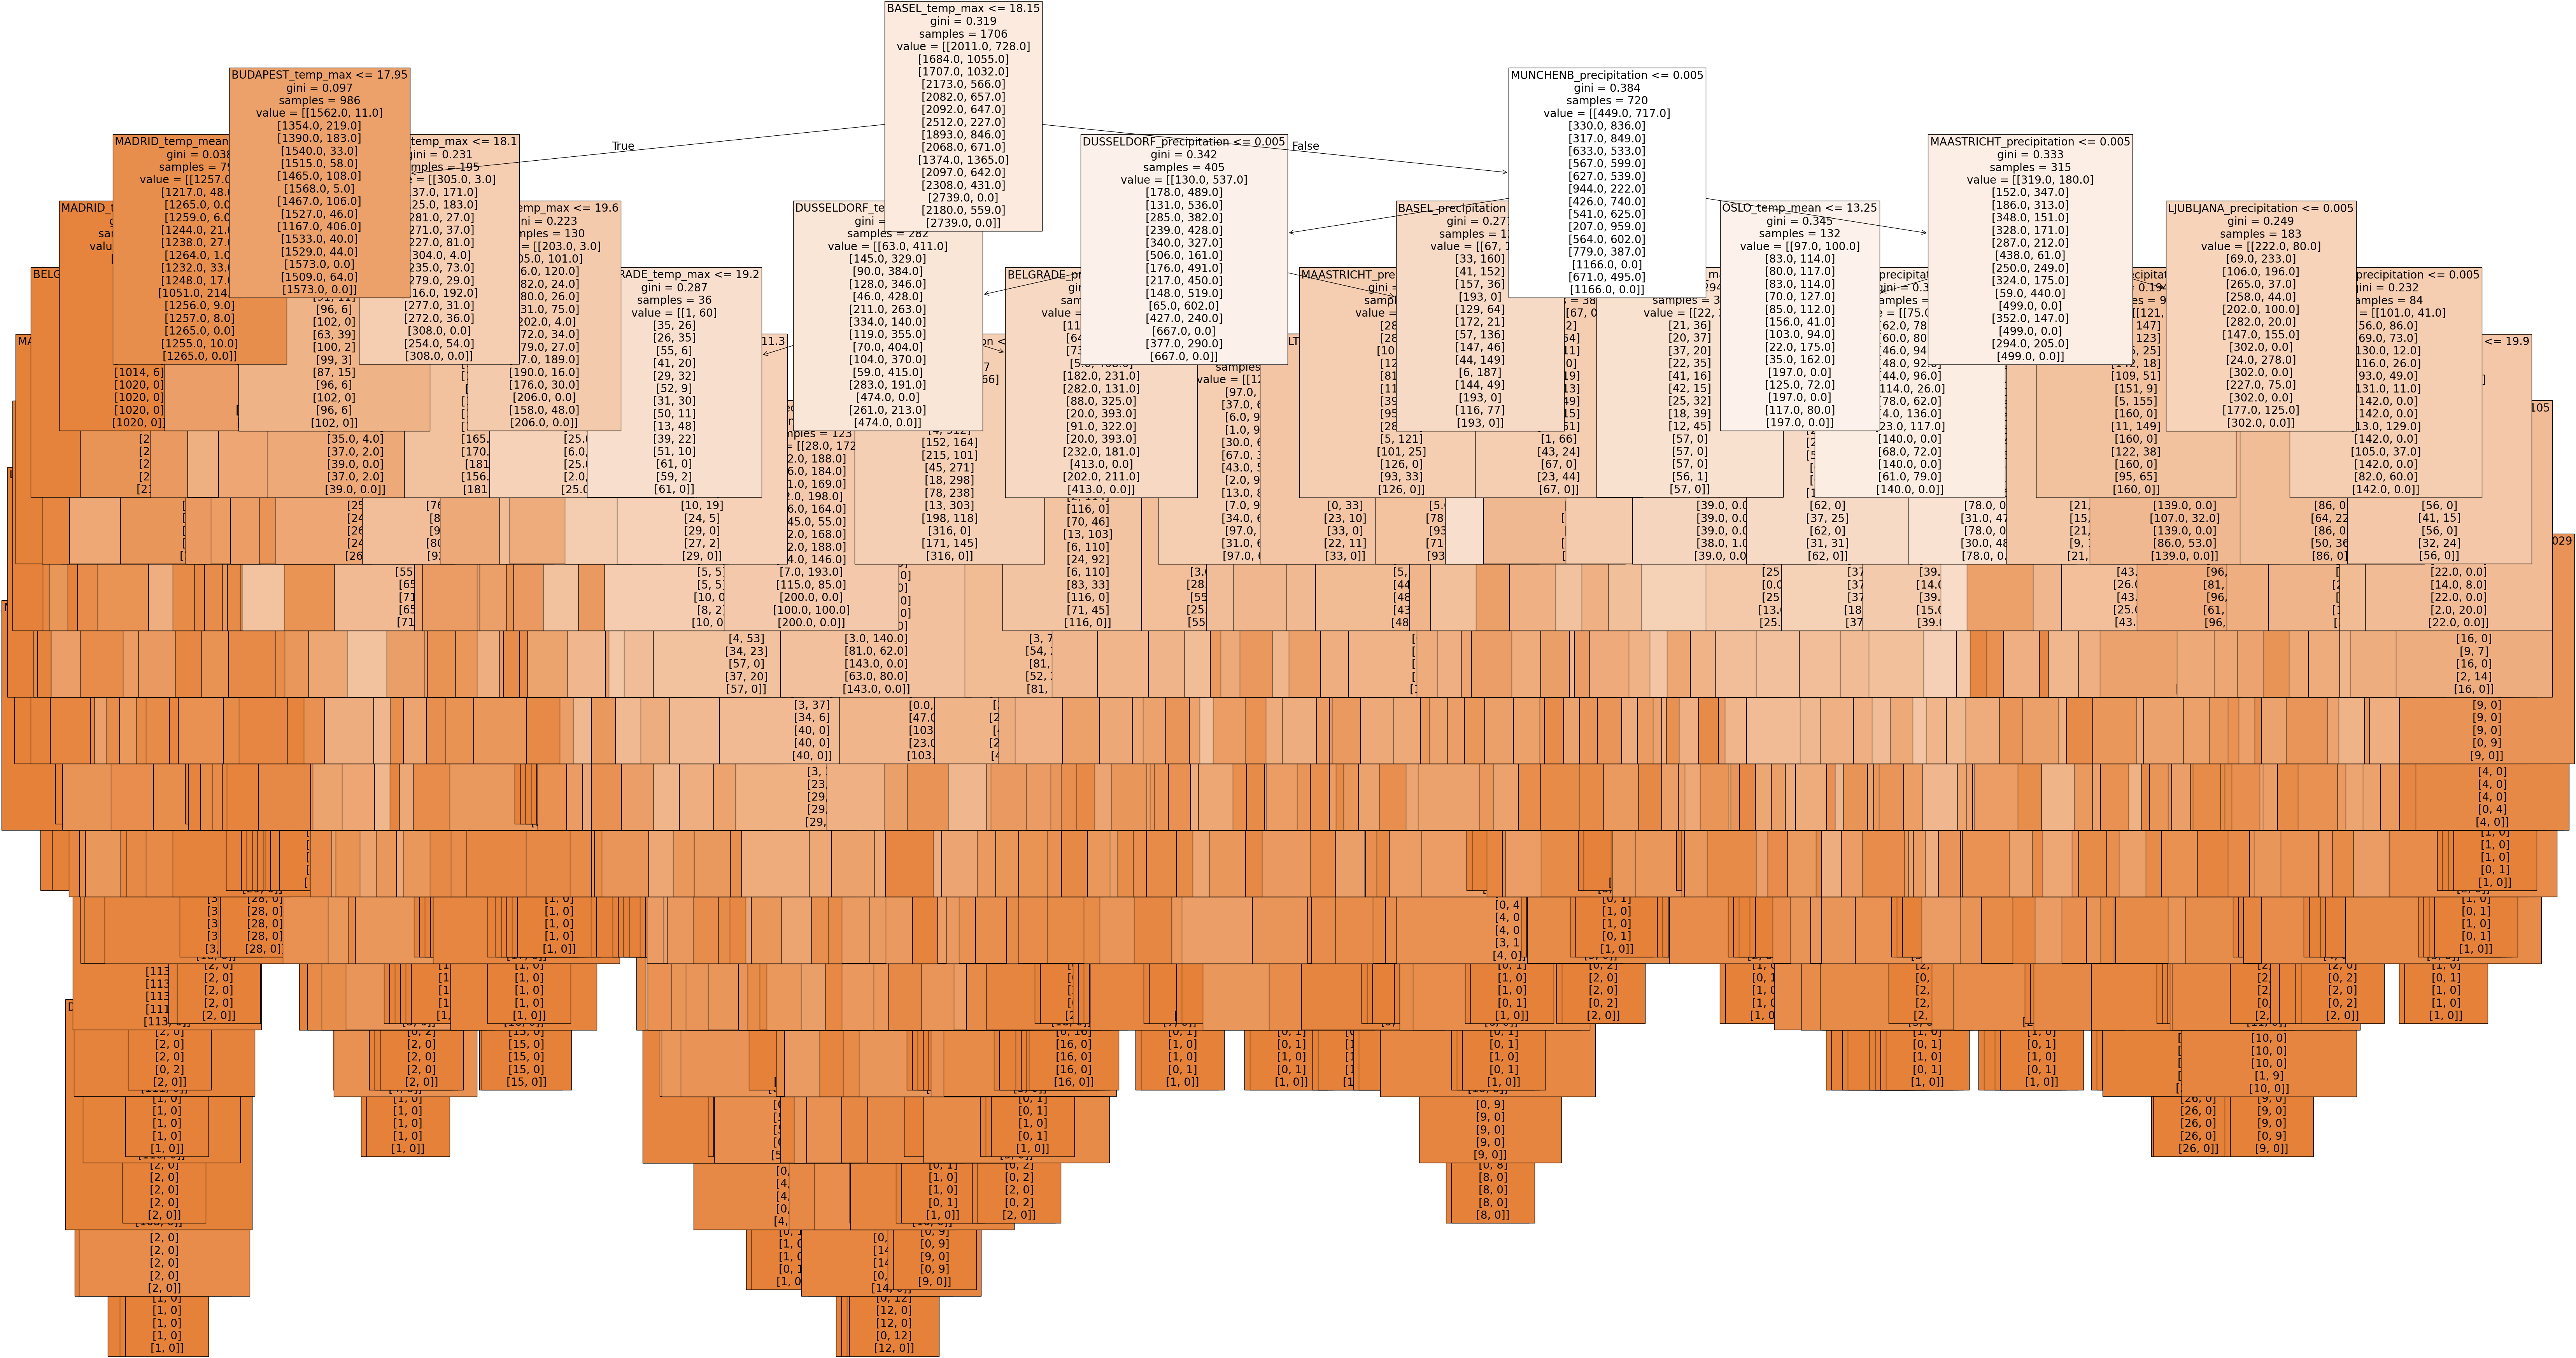

In [36]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [37]:
fig.savefig(os.path.join(path, '04 Visualizations', 'optimized_random_forest_2010s.png'),bbox_inches='tight')

## 7. Uncovering Feature Importances

In [38]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.64818177e-03, 2.45299801e-03, 2.24172884e-03, 2.36108829e-03,
       2.99948671e-02, 4.03163745e-03, 5.40822380e-03, 2.03861965e-03,
       6.58589931e-02, 2.85641845e-03, 2.35153022e-03, 2.50833191e-03,
       1.95562699e-03, 2.70572538e-02, 2.09149432e-03, 3.42176988e-03,
       1.96242366e-03, 8.24957382e-03, 3.03306261e-04, 0.00000000e+00,
       0.00000000e+00, 9.21013280e-04, 2.58290771e-02, 9.18803338e-04,
       9.21861876e-03, 2.15627188e-03, 2.00040383e-02, 1.46075174e-03,
       1.95170486e-03, 2.31485286e-03, 2.67551626e-03, 2.03186235e-02,
       2.74679381e-03, 2.41435549e-03, 2.15588871e-03, 6.15652345e-02,
       1.32313823e-03, 1.93097376e-03, 2.05537514e-03, 1.96153488e-03,
       3.15198726e-02, 2.77946406e-03, 1.14497536e-02, 1.96392946e-03,
       1.02174240e-01, 2.01030349e-03, 3.24820517e-03, 2.38579207e-03,
       3.36561413e-03, 1.42259061e-02, 3.68235367e-03, 2.96528237e-03,
       2.05391725e-03, 9.17767156e-03, 1.29811674e-03, 1.68738528e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.64818177e-03, 2.45299801e-03, 2.24172884e-03, 2.36108829e-03,
         2.99948671e-02, 4.03163745e-03, 5.40822380e-03, 2.03861965e-03,
         6.58589931e-02],
        [2.85641845e-03, 2.35153022e-03, 2.50833191e-03, 1.95562699e-03,
         2.70572538e-02, 2.09149432e-03, 3.42176988e-03, 1.96242366e-03,
         8.24957382e-03],
        [3.03306261e-04, 0.00000000e+00, 0.00000000e+00, 9.21013280e-04,
         2.58290771e-02, 9.18803338e-04, 9.21861876e-03, 2.15627188e-03,
         2.00040383e-02],
        [1.46075174e-03, 1.95170486e-03, 2.31485286e-03, 2.67551626e-03,
         2.03186235e-02, 2.74679381e-03, 2.41435549e-03, 2.15588871e-03,
         6.15652345e-02],
        [1.32313823e-03, 1.93097376e-03, 2.05537514e-03, 1.96153488e-03,
         3.15198726e-02, 2.77946406e-03, 1.14497536e-02, 1.96392946e-03,
         1.02174240e-01],
        [2.01030349e-03, 3.24820517e-03, 2.38579207e-03, 3.36561413e-03,
         1.42259061e-02, 3.68235367e-03, 2.96528237e-03, 2.05391725

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11603634, 0.05245442, 0.05935113, 0.09760372, 0.15715828,
       0.04311505, 0.02660726, 0.07257267, 0.1251778 , 0.07174454,
       0.07640335, 0.04296169, 0.01827448, 0.03747877, 0.00306049])

In [41]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [42]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [43]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [44]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

HEATHROW      0.157158
STOCKHOLM     0.125178
BASEL         0.116036
BELGRADE      0.097604
MAASTRICHT    0.076403
OSLO          0.072573
BUDAPEST      0.071745
DUSSELDORF    0.059351
KASSEL        0.052454
LJUBLJANA     0.043115
SONNBLICK     0.042962
VALENTIA      0.037479
DEBILT        0.026607
MUNCHENB      0.018274
MADRID        0.003060
dtype: float64

In [45]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'KASSEL', 'DUSSELDORF', 'BELGRADE', 'HEATHROW', 'LJUBLJANA', 'DEBILT', 'OSLO', 'STOCKHOLM', 'BUDAPEST', 'MAASTRICHT', 'SONNBLICK', 'MUNCHENB', 'VALENTIA', 'MADRID']


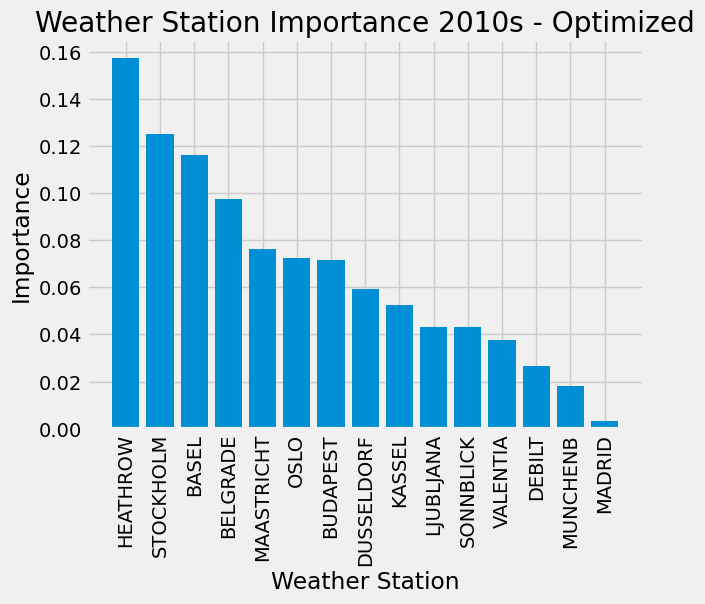

In [46]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, '04 Visualizations', 'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()